# Evaluate the question matcher using the existing harmonisation tool as a gold standard



In [1]:
MODEL_NAME = "Model 6: Transformer with cosine similarity"

In [2]:
import sys

sys.path.append("../front_end")

from IPython.display import display, HTML
import bz2
import os
import pickle as pkl
import re
import sys
from nltk.corpus import stopwords
from langdetect import detect
import numpy as np
import operator 
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from utils.spacy_wrapper import get_spacy_model

pd.set_option("max_colwidth", None)
pd.set_option("max_seq_items", None)

In [3]:
INPUT_FILE = "../data/Final harmonised item tool EM.xlsx"


In [4]:
validation_data = {}

for sheet_name in ("Childhood","Adulthood"):

    df = pd.read_excel(INPUT_FILE, sheet_name=sheet_name)

    if sheet_name == "Adulthood":
        labels_in_this_sheet = ["Adulthood"] * len(df)
        df = df[df.columns[4:]]
    else:
        labels_in_this_sheet = list(df["Developmental period"])
        df = df[df.columns[5:]]

    all_questions = []
    category_to_id = {}
    for idx in range(0, len(df)):
        questions_in_survey = []
        for column in df.columns:
            cell_content = df[column].iloc[idx]
            if type(cell_content) is str:
                for text in cell_content.split("/"):
                    text = re.sub(r'[^A-Za-z -,]', '', text.strip()).strip()
                    category = column.strip()
                    if category not in category_to_id:
                        category_to_id[category] = len(category_to_id)
                    category_id = category_to_id[category]
                    if len(text) > 2:
                        questions_in_survey.append((text, category_id))
        all_questions.append(questions_in_survey)
    
    validation_data[sheet_name] = all_questions

In [5]:
validation_data["GAD-7"] = [[], []]
for en, pt in zip("""Feeling nervous, anxious, or on edge
Not being able to stop or control worrying
Worrying too much about different things
Trouble relaxing
Being so restless that it is hard to sit still
Becoming easily annoyed or irritable
Feeling afraid, as if something awful might happen""".split("\n"),
"""Sentir-se nervoso/a, ansioso/a ou muito tenso/a
Não ser capaz de impedir ou de controlar as preocupações
Preocupar-se muito com diversas coisas
Dificuldade para relaxar
Ficar tão agitado/a que se torna difícil permanecer sentado/a
Ficar facilmente aborrecido/a ou irritado/a
Sentir medo como se algo horrível fosse acontecer""".split("\n")
                 ):
    validation_data["GAD-7"][0].append((en, en))
    validation_data["GAD-7"][1].append((pt, en))

In [6]:
from utils.question_matcher_transformer_huggingface_negation_efficient import QuestionMatcherTransformerHuggingFaceNegationEfficient

In [7]:
qm = QuestionMatcherTransformerHuggingFaceNegationEfficient()

Validating on dataset Childhood
	Processing 47 instruments of average length 23 questions each


/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/harmony/lib/python3.10/site-packages/sentence_transformers/util.py:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  a = torch.tensor(a)


	Calculated 562315 match scores
	Generated 562315 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES Childhood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Tries to Stop Quarrels,"Is helpful if someone is hurt, upset or feeling ill",0.01,1
1,Tries to Stop Quarrels,"Is helpful if someone is hurt, upset or feeling ill",0.01,1
2,Tries to Stop Quarrels,"Is helpful if someone is hurt, upset or feeling ill",0.01,1
3,Tries to Stop Quarrels,"Is helpful if someone is hurt, upset or feeling ill",0.01,1
4,Tries to Stop Quarrels,"Is helpful if someone is hurt, upset or feeling ill",0.01,1
5,Tries to Stop Quarrels,"Is helpful if someone is hurt, upset or feeling ill",0.01,1
6,Tries to Stop Quarrels,"Is helpful if someone is hurt, upset or feeling ill",0.01,1
7,Tries to Stop Quarrels,"Is helpful if someone is hurt, upset or feeling ill",0.01,1
8,Tries to Stop Quarrels,"Is helpful if someone is hurt, upset or feeling ill",0.01,1
9,Tries to Stop Quarrels,"Is helpful if someone is hurt, upset or feeling ill",0.01,1



FALSE POSITIVES OR WEAKEST REJECTIONS Childhood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,"""Does not unduly avoid or seek attention","""Does not unduly avoid or seek attention",1.00,0
1,"""Does not unduly avoid or seek attention","""Does not unduly avoid or seek attention",1.00,0
2,"""Averagenot particularly quarrelsome","""Averagenot particularly quarrelsome",1.00,0
3,"""Averagenot particularly quarrelsome","""Averagenot particularly quarrelsome",1.00,0
4,"""Normally competitive","""Normally competitive",1.00,0
5,"""Normally competitive","""Normally competitive",1.00,0
6,"Overcompetitive with other children""","diffident about competing with other children""",0.93,0
7,"diffident about competing with other children""","Overcompetitive with other children""",0.93,0
8,Child bullies other children,Is bullied by other children,0.89,0
9,Child bullies other children,Is bullied by other children,0.89,0


Validating on dataset Adulthood
	Processing 28 instruments of average length 16 questions each
	Calculated 96017 match scores
	Generated 96017 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES Adulthood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,I did everything wrong,What is your opinion of yourself compared to other people (rate selfdepreciation),0.01,1
1,I did everything wrong,What is your opinion of yourself compared to other people (rate selfdepreciation),0.01,1
2,I did everything wrong,What is your opinion of yourself compared to other people (rate selfdepreciation),0.01,1
3,I did everything wrong,What is your opinion of yourself compared to other people (rate selfdepreciation),0.01,1
4,I cried a lot,Been able to enjoy your normal daytoday activities (*note this is the closest approximation of 'low mood' identified in this measure This items may be better conceptualised as capturing 'loss of interest'),0.01,1
5,I cried a lot,Been able to enjoy your normal daytoday activities (*note this is the closest approximation of 'low mood' identified in this measure This items may be better conceptualised as capturing 'loss of interest'),0.01,1
6,I cried a lot,Been able to enjoy your normal daytoday activities (*note this is the closest approximation of 'low mood' identified in this measure This items may be better conceptualised as capturing 'loss of interest'),0.01,1
7,I cried a lot,Been able to enjoy your normal daytoday activities (*note this is the closest approximation of 'low mood' identified in this measure This items may be better conceptualised as capturing 'loss of interest'),0.01,1
8,I cried a lot,Been able to enjoy your normal daytoday activities (*note this is the closest approximation of 'low mood' identified in this measure This items may be better conceptualised as capturing 'loss of interest'),0.01,1
9,I cried a lot,Been able to enjoy your normal daytoday activities (*note this is the closest approximation of 'low mood' identified in this measure This items may be better conceptualised as capturing 'loss of interest'),0.01,1



FALSE POSITIVES OR WEAKEST REJECTIONS Adulthood



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Do you often feel depressed,Do you often feel tired most of the time,0.81,0
1,Do you often feel tired most of the time,Do you often feel depressed,0.81,0
2,Do you often feel depressed,Do you often feel tired most of the time,0.81,0
3,Do you often feel tired most of the time,Do you often feel depressed,0.81,0
4,Do you often feel depressed,Do you often feel tired most of the time,0.81,0
5,Do you often feel tired most of the time,Do you often feel depressed,0.81,0
6,Do you often feel depressed,Do you often feel tired most of the time,0.81,0
7,Do you often feel tired most of the time,Do you often feel depressed,0.81,0
8,Do you often feel depressed,Do you often feel tired most of the time,0.81,0
9,Do you often feel tired most of the time,Do you often feel depressed,0.81,0


Validating on dataset GAD-7
Found GAD-7 Portuguese
	Processing 2 instruments of average length 7 questions each
	Calculated 49 match scores
	Generated 49 gold-standard values to compare them to
	Calculating ROC curve

FALSE NEGATIVES OR WEAKEST MATCHES GAD-7



,Instrument 1,Instrument 2,Score from model,Ground truth
0,"Feeling nervous, anxious, or on edge","Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.80,1
1,Being so restless that it is hard to sit still,Ficar tão agitado/a que se torna difícil permanecer sentado/a,0.81,1
2,Becoming easily annoyed or irritable,Ficar facilmente aborrecido/a ou irritado/a,0.88,1
3,Trouble relaxing,Dificuldade para relaxar,0.91,1
4,Not being able to stop or control worrying,Não ser capaz de impedir ou de controlar as preocupações,0.91,1
5,"Feeling afraid, as if something awful might happen",Sentir medo como se algo horrível fosse acontecer,0.92,1
6,Worrying too much about different things,Preocupar-se muito com diversas coisas,0.93,1



FALSE POSITIVES OR WEAKEST REJECTIONS GAD-7



,Instrument 1,Instrument 2,Score from model,Ground truth
0,Being so restless that it is hard to sit still,Dificuldade para relaxar,0.60,0
1,Becoming easily annoyed or irritable,Ficar tão agitado/a que se torna difícil permanecer sentado/a,0.54,0
2,Becoming easily annoyed or irritable,Dificuldade para relaxar,0.54,0
3,Becoming easily annoyed or irritable,"Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.54,0
4,"Feeling nervous, anxious, or on edge",Ficar facilmente aborrecido/a ou irritado/a,0.53,0
5,Not being able to stop or control worrying,Ficar facilmente aborrecido/a ou irritado/a,0.49,0
6,"Feeling afraid, as if something awful might happen","Sentir-se nervoso/a, ansioso/a ou muito tenso/a",0.49,0
7,Becoming easily annoyed or irritable,Não ser capaz de impedir ou de controlar as preocupações,0.48,0
8,Trouble relaxing,Ficar tão agitado/a que se torna difícil permanecer sentado/a,0.46,0
9,"Feeling nervous, anxious, or on edge",Não ser capaz de impedir ou de controlar as preocupações,0.45,0


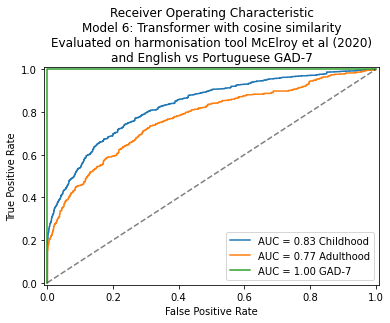

In [8]:
for dataset, dataset_data in validation_data.items():
#     if dataset != "GAD-7":
#         continue
    print (f"Validating on dataset {dataset}")
    question_dfs = []
    for questionnaire in dataset_data:
        df = pd.DataFrame({"question": [q for q, c in questionnaire]})
        df.attrs['language'] = "en"
        if dataset == "GAD-7" and "Sentir" in questionnaire[0][0]:
            df.attrs['language'] = "pt"
            print ("Found GAD-7 Portuguese")
        question_dfs.append(df)
    
    print (f"\tProcessing {len(question_dfs)} instruments of average length {int(np.round(np.mean([len(d) for d in question_dfs])))} questions each")
    matches = qm.match_questions(question_dfs, is_use_cosine_similarity=True)
    
    print (f"\tCalculated {len(matches)} match scores")
    
    gold_standard = {}
    for i in range(len(dataset_data)):
        for j in range(i + 1, len(dataset_data)):
            for ii in range(len(dataset_data[i])):
                for jj in range(len(dataset_data[j])):
                    gold_standard[(i, ii, j, jj)] = int(dataset_data[i][ii][1] == dataset_data[j][jj][1])
    
    print (f"\tGenerated {len(gold_standard)} gold-standard values to compare them to")
    
    print ("\tCalculating ROC curve")
    
    y_pred = []
    y_test = []
    for m, g in gold_standard.items():
        y_pred.append(abs(matches.get(m, 0)))
        y_test.append(g)

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label = f'AUC = {roc_auc:0.2f} {dataset}')
    
    print (f"\nFALSE NEGATIVES OR WEAKEST MATCHES {dataset}\n")

    all_positives = [m for m in gold_standard if gold_standard[m] == 1 ]
    estimated_values_for_gt_1 = dict([(m,abs(matches[m])) for m in all_positives ])

    ctr = 0    
    examples = []
    for match_tuple, score_from_model in sorted(estimated_values_for_gt_1.items(), key=operator.itemgetter(1)):
        examples.append((question_dfs[match_tuple[0]].question.iloc[match_tuple[1]], question_dfs[match_tuple[2]].question.iloc[match_tuple[3]], np.round(score_from_model, 2)))

        ctr += 1
        if ctr > 10:
            break
    df_examples = pd.DataFrame({"Instrument 1":[e[0] for e in examples],"Instrument 2":[e[1] for e in examples],"Score from model":[e[2] for e in examples]})
    df_examples["Ground truth"] = 1
    display(df_examples)
    

    print (f"\nFALSE POSITIVES OR WEAKEST REJECTIONS {dataset}\n")

    all_negatives = [m for m in gold_standard if gold_standard[m] == 0 ]
    estimated_values_for_gt_1 = dict([(m,abs(matches[m])) for m in all_negatives ])

    ctr = 0
    examples = []
    for match_tuple, score_from_model in sorted(estimated_values_for_gt_1.items(), key=operator.itemgetter(1), reverse=True):
        examples.append((question_dfs[match_tuple[0]].question.iloc[match_tuple[1]], question_dfs[match_tuple[2]].question.iloc[match_tuple[3]], np.round(score_from_model, 2)))

        ctr += 1
        if ctr > 10:
            break
    df_examples = pd.DataFrame({"Instrument 1":[e[0] for e in examples],"Instrument 2":[e[1] for e in examples],"Score from model":[e[2] for e in examples]})
    df_examples["Ground truth"] = 0
    display(df_examples)

            
plt.title(f'Receiver Operating Characteristic\n{MODEL_NAME}\nEvaluated on harmonisation tool McElroy et al (2020)\nand English vs Portuguese GAD-7')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'--', color='black', alpha=0.5)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()